In [1]:
!pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.8 MB/s eta 0:00:00


In [2]:
!git clone "https://github.com/Atharva-Malode/ML-Bootcamp"

Cloning into 'ML-Bootcamp'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 143 (delta 1), reused 1 (delta 1), pack-reused 128
Receiving objects: 100% (143/143), 826.84 KiB | 21.20 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [3]:
!cp "/content/ML-Bootcamp/Week-1/Day-2/plots.py" "/content/"

In [4]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib widget
from google.colab import output
output.enable_custom_widget_manager()
from mpl_toolkits.mplot3d import Axes3D
from plots import plot_regression_line, visualize_data, plot_real_cost_function, soup_bowl_3D, soup_bowl_2D, soup_bowl_3D_interactive, visualize_gradient, visualize_gradient_2D

In [5]:
# Generate random dataset
np.random.seed(42)
X = np.random.rand(100)
Y = 2 * X + 1 + np.random.randn(100) * 0.1

# Set initial parameter values
w_initial = 0
b_initial = 0

# Set hyperparameters
learning_rate = 0.01
num_iterations = 10000

## Computing Cost
The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.

In [9]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression.

    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target vlllllllalues
      w,b (scalar)    : model parameters

    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]

    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum = cost_sum + cost
    total_cost = (1 / (2*m)) * cost_sum
    return total_cost

interactive(children=(FloatSlider(value=1.0, description='w', max=4.0, min=-2.0), FloatSlider(value=-1.0, desc…

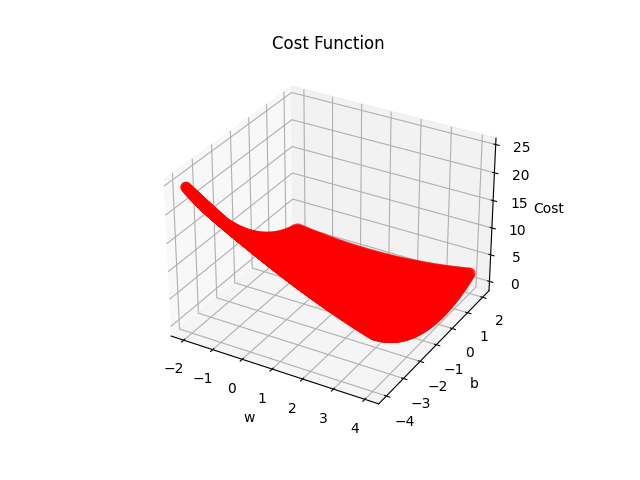

In [11]:
plot_real_cost_function(X,Y,compute_cost)

interactive(children=(IntSlider(value=0, description='w1', max=20, min=-20), IntSlider(value=0, description='b…

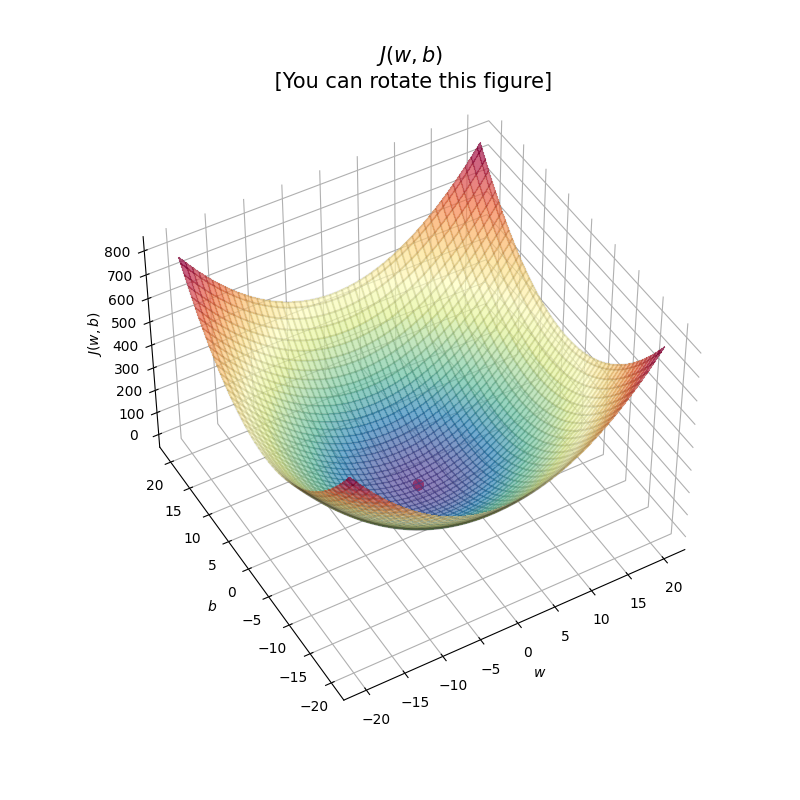

In [13]:
soup_bowl_3D_interactive()

# Gradient Descent

interactive(children=(IntSlider(value=0, description='w1', max=20, min=-20), IntSlider(value=0, description='b…

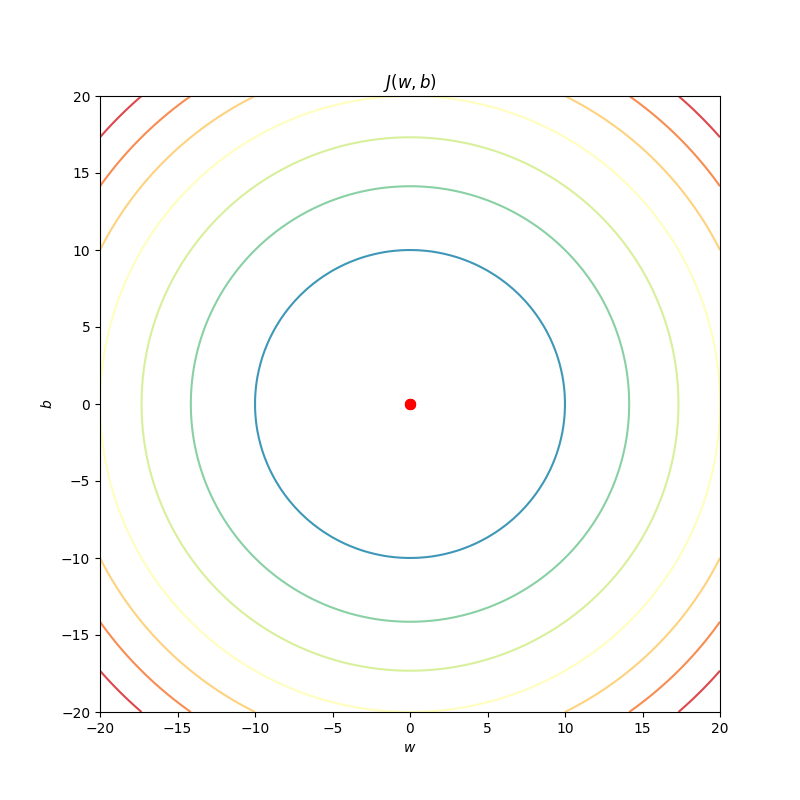

In [14]:
soup_bowl_2D()

## 1. Compute Gradient
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{3}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{4}\\
\end{align}
$$

In [15]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i]+b
        dj_dw_i = (f_wb-y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

## 2. Update the parameters <code>num_iterations</code> times
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.

In [17]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w, b. Updates w, b by taking
    num_iters gradient steps with learning rate alpha

    Args:
        x (ndarray (m,)): Data, m examples
        y (ndarray (m,)): Target values
        w_in, b_in (scalar): Initial values of model parameters
        alpha (float): Learning rate
        num_iters (int): Number of iterations to run gradient descent
        cost_function: Function to compute the cost
        gradient_function: Function to compute the gradient

    Returns:
        w (scalar): Updated value of the parameter w after running gradient descent
        b (scalar): Updated value of the parameter b after running gradient descent
        J_history (list): History of cost values
        p_history (list): History of parameters [w, b]
    """
    # An array to store cost J and parameter values at each iteration
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update parameters using gradient descent
        b -= alpha * dj_db
        w -= alpha * dj_dw

        #The rest of code is for plotting and displaying the output
        # Save cost J and parameter values at each iteration
        J_history.append((x, y, w, b))
        p_history.append([w, b])

        # Print cost and parameter values at regular intervals
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} "
                  f"w: {w.item(): 0.3e}, b: {b.item(): 0.5e}")

    # Plot the cost function
    plt.plot(J_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Gradient Descent: Cost vs. Iteration')
    plt.show()

    return w, b, J_history, p_history

# Example usage
w_final, b_final, J_history, p_history = gradient_descent(X, Y, w_initial, b_initial, 0.01, 1000, compute_cost, compute_gradient)

TypeError: ignored

Iteration    0: Cost 2.00e+00  dj_dw: -1.083e+00, dj_db: -1.940e+00   w:  1.083e-02, b: 1.94025e-02
Iteration   10: Cost 1.58e+00  dj_dw: -9.655e-01, dj_db: -1.709e+00   w:  1.126e-01, b: 2.00443e-01
Iteration   20: Cost 1.24e+00  dj_dw: -8.613e-01, dj_db: -1.504e+00   w:  2.033e-01, b: 3.59832e-01
Iteration   30: Cost 9.80e-01  dj_dw: -7.692e-01, dj_db: -1.323e+00   w:  2.843e-01, b: 5.00107e-01
Iteration   40: Cost 7.76e-01  dj_dw: -6.878e-01, dj_db: -1.164e+00   w:  3.566e-01, b: 6.23511e-01
Iteration   50: Cost 6.17e-01  dj_dw: -6.159e-01, dj_db: -1.023e+00   w:  4.214e-01, b: 7.32022e-01
Iteration   60: Cost 4.93e-01  dj_dw: -5.524e-01, dj_db: -8.990e-01   w:  4.794e-01, b: 8.27387e-01
Iteration   70: Cost 3.96e-01  dj_dw: -4.962e-01, dj_db: -7.894e-01   w:  5.315e-01, b: 9.11150e-01
Iteration   80: Cost 3.21e-01  dj_dw: -4.466e-01, dj_db: -6.927e-01   w:  5.783e-01, b: 9.84673e-01
Iteration   90: Cost 2.62e-01  dj_dw: -4.027e-01, dj_db: -6.073e-01   w:  6.205e-01, b: 1.04916e+00


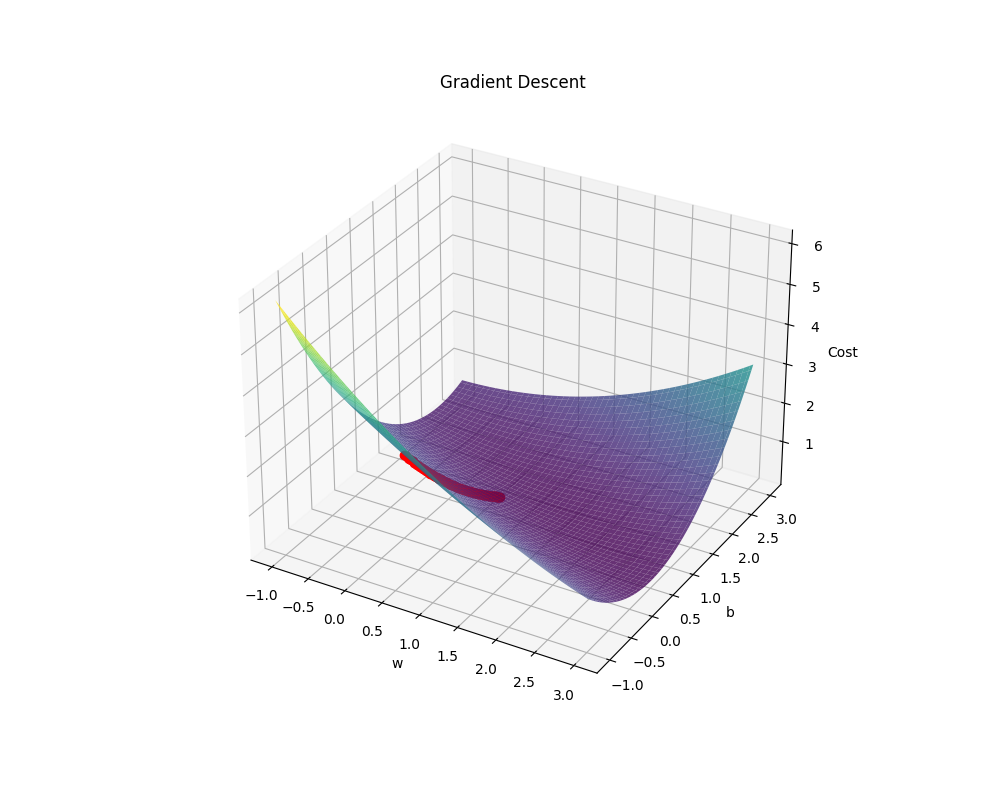

In [18]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
        x (ndarray (m,))  : Data, m examples
        y (ndarray (m,))  : target values
        w_in,b_in (scalar): initial values of model parameters
        alpha (float):     Learning rate
        num_iters (int):   number of iterations to run gradient descent
        cost_function:     function to call to produce cost
        gradient_function: function to call to produce gradient

    Returns:
        w (scalar): Updated value of parameter after running gradient descent
        b (scalar): Updated value of parameter after running gradient descent
        J_history (List): History of cost values
        p_history (list): History of parameters [w,b]
    """

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i < 100000:  # prevent resource exhaustion
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw.item(): 0.3e}, dj_db: {dj_db.item(): 0.3e}  ",
                  f"w: {w.item(): 0.3e}, b:{b.item(): 0.5e}")

    # Plot 3D graph
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Create a grid of w and b values
    w_vals = np.linspace(-1, 3, 100)
    b_vals = np.linspace(-1, 3, 100)
    W, B = np.meshgrid(w_vals, b_vals)

    # Compute the cost for each combination of w and b
    cost_vals = np.zeros_like(W)
    for i in range(len(w_vals)):
        for j in range(len(b_vals)):
            cost_vals[i, j] = cost_function(x, y, W[i, j], B[i, j])

    # Plot the 3D surface plot of the cost function
    ax.plot_surface(W, B, cost_vals, cmap='viridis', alpha=0.8)
    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_zlabel('Cost')
    ax.set_title('Gradient Descent')

    # Plot the history of parameter updates
    w_history, b_history = zip(*p_history)
    ax.plot(w_history, b_history, J_history, color='red', marker='o')

    plt.show()

# Example usage
gradient_descent(X, Y, w_initial, b_initial, alpha=0.01, num_iters=100, cost_function=compute_cost, gradient_function=compute_gradient)

In [19]:
import pandas as pd
data = pd.DataFrame({'X': X, 'Y':Y})



In [23]:
data

,X,Y
0,0.374540,1.757785
1,0.950714,2.871528
2,0.731994,2.473164
3,0.598658,1.998560
4,0.156019,1.290070
...,...,...
95,0.493796,1.906010
96,0.522733,2.037755
97,0.427541,1.889197
98,0.025419,1.078507


In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
X =data[['X']]
Y =data['Y']
model.fit(X,Y)

LinearRegression()

In [25]:
print("Slope(w):", model.coef_[0])
print("Intercept(b):", model.intercept_)

Slope(w): 1.954022677287697
Intercept(b): 1.0215096157546748


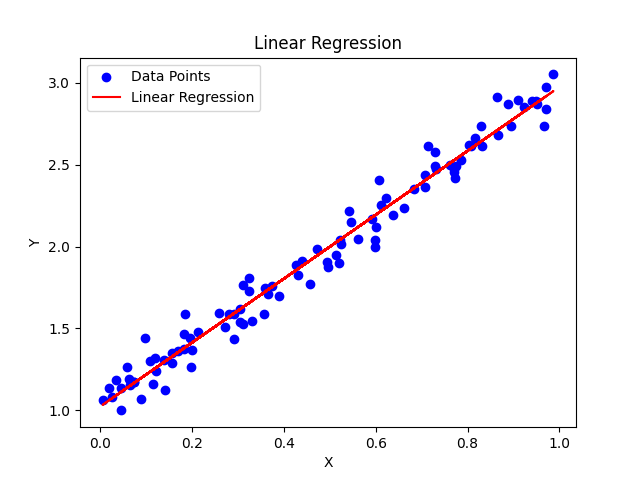

In [28]:
plot_regression_line(X,Y,model)

In [ ]:
X_test=np.array([[0.8]])
Y_test=model.predict(X_test)